<a href="https://colab.research.google.com/github/ucfilho/raianars_june_2020/blob/master/Figure_05_and_06_paper_PCA_all_functions_from_zip_jun_23_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from matplotlib import pyplot as PLT
plt.style.use('seaborn-whitegrid')
from pylab import *
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
import random

# TRAIN DATASET
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
Hello world
I'm evolving!!!



In [2]:
# https://github.com/scentellegher/code_snippets/blob/master/pca_loadings/pca_loadings.ipynb
# https://shankarmsy.github.io/posts/pca-sklearn.html

In [3]:
Transfere='imput_ANN_D10_30_out_07_19.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [4]:
labels=[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [5]:
# 2019-10-07_12h50min_DE_Rosenbrock_30.xlsx

In [6]:
i=0
for name in labels:
  print('i=',i,name)
  i=i+1

i= 0 2019-10-05_02h51min_DE_Rosenbrock_10.csv
i= 1 2019-10-05_02h58min_DE_Sphere_10.csv
i= 2 2019-10-05_03h13min_DE_Rastrigin_10.csv
i= 3 2019-10-05_03h20min_DE_Schwefel_10.csv
i= 4 2019-10-05_03h27min_DE_Sum_of_different_powers_10.csv
i= 5 2019-10-05_03h36min_DE_Ackley_10.csv
i= 6 2019-10-05_03h42min_DE_Michalewicz_10.csv
i= 7 2019-10-07_12h50min_DE_Rosenbrock_30.csv
i= 8 2019-10-07_13h05min_DE_Sphere_30.csv
i= 9 2019-10-07_13h40min_DE_Schwefel_30.csv
i= 10 2019-10-07_14h17min_DE_Rastrigin_30.csv
i= 11 2019-10-07_14h35min_DE_Sum_of_different_powers_30.csv
i= 12 2019-10-07_14h53min_DE_Ackley_30.csv
i= 13 2019-10-07_15h14min_DE_Michalewicz_30.csv


In [19]:
Rows_Var=['Rosenbrock D=10', 'Sphere D=10','Rastrigin D=10',
'Rosenbrock D=30','Sphere D=30','Rastrigin D=30',
'Schwefel D=10','Sum diff. powers D=10','Ackley D=10',
'Schwefel D=30','Sum diff. powers D=30','Ackley D=30',
'Michalewicz D=10', 'Michalewicz D=30']

Legends=['a)', 'b)','c)',
'd)','e)','f)',
'g)','h)','i)',
'j)','k)','l)',
'm)', 'n)']

'''
i= 0 2019-10-05_02h51min_DE_Rosenbrock_10.csv
i= 1 2019-10-05_02h58min_DE_Sphere_10.csv
i= 2 2019-10-05_03h13min_DE_Rastrigin_10.csv
i= 7 2019-10-07_12h50min_DE_Rosenbrock_30.csv
i= 8 2019-10-07_13h05min_DE_Sphere_30.csv
i= 10 2019-10-07_14h17min_DE_Rastrigin_30.csv
Sequence=[0,1,2,7,8,10]
i= 3 2019-10-05_03h20min_DE_Schwefel_10.csv
i= 4 2019-10-05_03h27min_DE_Sum_of_different_powers_10.csv
i= 5 2019-10-05_03h36min_DE_Ackley_10.csv
i= 9 2019-10-07_13h40min_DE_Schwefel_30.csv
i= 11 2019-10-07_14h35min_DE_Sum_of_different_powers_30.csv
i= 12 2019-10-07_14h53min_DE_Ackley_30.csv
Sequence=[0,1,2,7,8,10, 3,4,5,9,11,12]
i= 6 2019-10-05_03h42min_DE_Michalewicz_10.csv
i= 13 2019-10-07_15h14min_DE_Michalewicz_30.csv
Sequence=[0,1,2,7,8,10, 3,4,5,9,11,12,  6, 13]
'''

'\ni= 0 2019-10-05_02h51min_DE_Rosenbrock_10.csv\ni= 1 2019-10-05_02h58min_DE_Sphere_10.csv\ni= 2 2019-10-05_03h13min_DE_Rastrigin_10.csv\ni= 7 2019-10-07_12h50min_DE_Rosenbrock_30.csv\ni= 8 2019-10-07_13h05min_DE_Sphere_30.csv\ni= 10 2019-10-07_14h17min_DE_Rastrigin_30.csv\nSequence=[0,1,2,7,8,10]\ni= 3 2019-10-05_03h20min_DE_Schwefel_10.csv\ni= 4 2019-10-05_03h27min_DE_Sum_of_different_powers_10.csv\ni= 5 2019-10-05_03h36min_DE_Ackley_10.csv\ni= 9 2019-10-07_13h40min_DE_Schwefel_30.csv\ni= 11 2019-10-07_14h35min_DE_Sum_of_different_powers_30.csv\ni= 12 2019-10-07_14h53min_DE_Ackley_30.csv\nSequence=[0,1,2,7,8,10, 3,4,5,9,11,12]\ni= 6 2019-10-05_03h42min_DE_Michalewicz_10.csv\ni= 13 2019-10-07_15h14min_DE_Michalewicz_30.csv\nSequence=[0,1,2,7,8,10, 3,4,5,9,11,12,  6, 13]\n'

In [8]:
file_selected=labels[11] # just to test...
print(file_selected)

2019-10-07_14h35min_DE_Sum_of_different_powers_30.csv


In [9]:
df=pd.read_csv(file_selected)

In [10]:
col_names=df.columns
print(col_names)

Index(['Unnamed: 0', 'DIVERSIDADE (DI)', 'DI RELATIVO', 'FRAC Its',
       'VELOC FOBJ', 'VELOC X', 'NP', 'Fo', 'CRo', 'fmin', 'fmax', 'AD_fmin',
       'AD_fmax', 'DELTA FOBJ', 'DELTA VX', 'r_fitness', 'F', 'CR',
       'FUNCTION'],
      dtype='object')


In [11]:
fields=['DI RELATIVO', 'FRAC Its','Fo', 'CRo', 'F', 'CR']

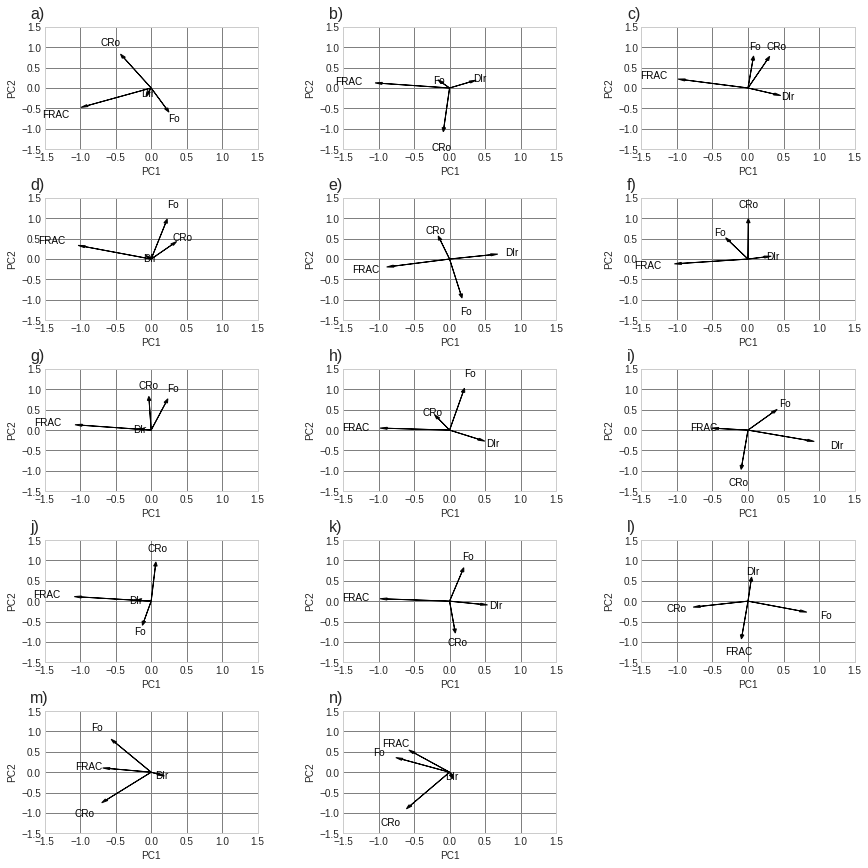

In [20]:
N=14
#Call the function. 
Name=fields 
Name=['DIr','FRAC','Fo','CRo']
Num=4

from sklearn import datasets
from sklearn.preprocessing import scale

Seq=[0,1,2,7,8,10, 3,4,5,9,11,12,  6, 13]

# apply PCA
Variance_explained=[]
for i in range(N):
  file_selected=labels[Seq[i]]
  df=pd.read_csv(file_selected)
  Parallel_Coord=df[fields]
  X=np.array(Parallel_Coord.iloc[:,range(4)])
  #y=np.array(Parallel_Coord[['F']])
  #y=np.array(Parallel_Coord[['CR']])


  pca = decomposition.PCA(n_components=2)
  X = pca.fit_transform(X)
  
  loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
  #print(loadings)
  loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=Name)
  #print(loading_matrix)
  #print(np.transpose(pca.components_[0:2, :]))
  coeff=np.transpose(pca.components_[0:2, :])
  Variance_explained.append(100*pca.explained_variance_ratio_)
  #print('=====',coeff)
  plt.subplot(5,3,i+1)


  for k in range(Num):

    plt.arrow(0, 0, coeff[k,0], coeff[k,1],color = 'k',head_width=0.05,
              head_length=0.1, fc='k', ec='k')
    plt.text(coeff[k,0]* 1.5, coeff[k,1] * 1.5, Name[k], color = 'k', ha = 'center', va = 'center')

  plt.ylim(-1.5, 1.5)     # set the ylim to bottom, top
  plt.xlim(-1.5, 1.5)     # set the ylim to bottom, top
  plt.xlabel("PC{}".format(1))
  plt.ylabel("PC{}".format(2))
  #plt.legend(Legends[i],loc='upper left')
  #plt.text(-1.7,1.7,Legends[i],fontsize=16, fontweight='bold')
  plt.text(-1.7,1.7,Legends[i],fontsize=16)
  plt.grid(True, linewidth=1,color='gray')
  

  
plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)



In [13]:
Variance=pd.DataFrame(Variance_explained,columns=['PC1', 'PC2'],index=Rows_Var)
print(Variance)
Variance_explained=pd.DataFrame(Variance_explained,columns=['PC1', 'PC2'])

                             PC1        PC2
Rosenbrock D=10        69.799873  22.748848
Sphere D=10            75.679595  17.742456
Rastrigin D=10         70.619190  18.619558
Rosenbrock D=30        71.503483  17.413327
Sphere D=30            77.378327  17.880057
Rastrigin D=30         70.986924  17.294680
Schwefel D=10          64.560131  23.849341
Sum diff. powers D=10  70.999680  18.887692
Ackley D=10            75.604070  14.750448
Schwefel D=30          72.124911  19.396379
Sum diff. powers D=30  72.654508  19.890184
Ackley D=30            58.737858  38.365688
Michalewicz D=10       66.700521  22.115274
Michalewicz D=30       49.932868  32.261040


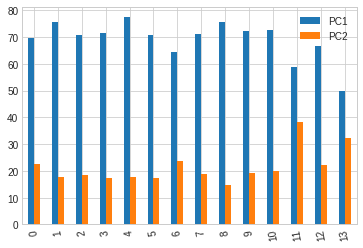

In [14]:
ax = Variance_explained.plot.bar(rot=100)

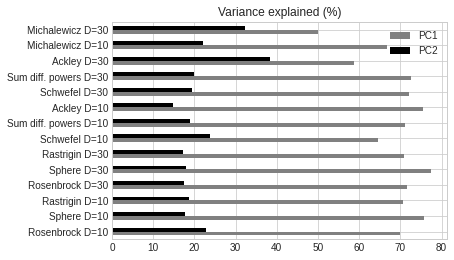

In [21]:
Variance.plot.barh(rot=0, title="Variance explained (%)",color=['gray','k'])